## 二分法

In [1]:
import numpy as np

In [2]:
def bisection_method(f, l, r, epsilon=1e-10, delta=1e-10, num_iter=100):
    root_lst = []
    if f(l) * f(r) > 0:
        print("Make sure  the root is in this interval!")
        return None, None
    for k in range(num_iter):
        c = (l + r) / 2
        root_lst.append(c)
        if abs(f(c)) < delta or abs(l-r) < epsilon:
            #if abs(c-r) < epsilon:
#                 print("Reconsider the initial values")
#             else:
#                 print("The number of iteration: ", k+1)
            print("The number of iteration: ", k+1)
            break
        elif f(l)*f(c) < 0:
            r = c
        else:
            l = c    
    return c, root_lst

## 1. 找到$x=\cos(x)$的根

In [3]:
import matplotlib.pyplot as plt

In [4]:
f = lambda x: np.cos(x) - x

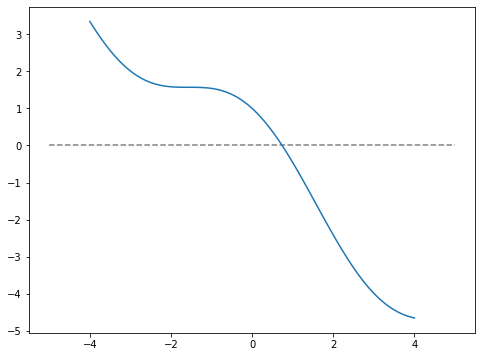

In [5]:
plt.figure(figsize=(8, 6))
xn = np.linspace(-4, 4, 100)
plt.plot(xn, f(xn))
plt.hlines(0, -5, 5, linestyles='--', alpha=0.5)
plt.show()

In [6]:
root, root_lst = bisection_method(f, -5, 5)
root

The number of iteration:  35


0.7390851332456805

### 迭代过程

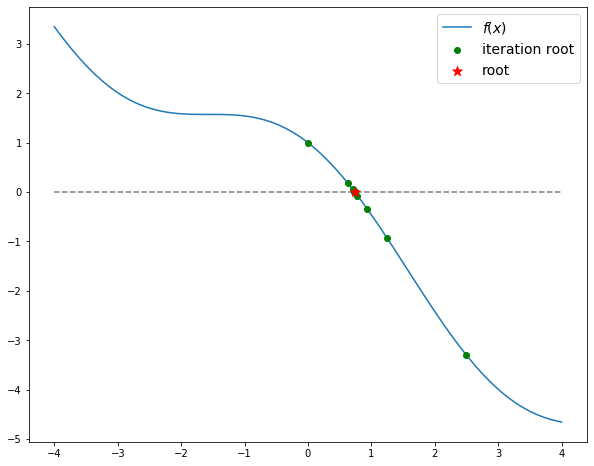

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn), label="$f(x)$")
plt.hlines(0, -4, 4, linestyles='--', alpha=0.5)
plt.scatter(root_lst, f(root_lst), c='g', zorder=5, label="iteration root")
plt.scatter(root, f(root), c='r', marker='*', s=100, zorder=10, label="root")
plt.legend(fontsize=14)
plt.show()

### 条件数

In [8]:
df = lambda x: -np.sin(x) - 1
conditons = 1 / abs(df(root))
conditons, df(root)

(0.5975100456672503, -1.6736120292057715)

### 使用 `Scipy`

In [9]:
import scipy.optimize as optimize

root = optimize.bisect(f, -100, 100)
root

0.7390851332147008

## 2. 找到$|x| =e^x$的根

In [10]:
g = lambda x: np.abs(x) - np.exp(x)

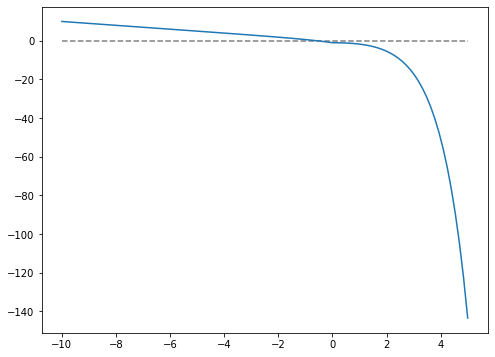

In [17]:
xn = np.linspace(-10, 5, 100)
plt.figure(figsize=(8, 6))
plt.plot(xn, g(xn))
plt.hlines(0, -10, 5, linestyles='--', alpha=0.5)
plt.show()

In [12]:
root, root_lst = bisection_method(g, -5, 5)
root

The number of iteration:  36


-0.567143290390959

### 迭代过程

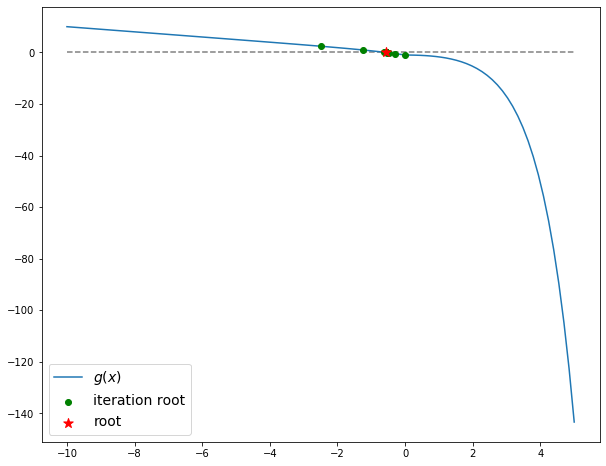

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(xn, g(xn), label="$g(x)$")
plt.hlines(0, -10, 5, linestyles='--', alpha=0.5)
plt.scatter(root_lst, g(root_lst), c='g', zorder=5, label="iteration root")
plt.scatter(root, g(root), c='r', marker='*', s=100, zorder=10, label="root")
plt.legend(fontsize=14)
plt.show()

### 使用`Scipy`

In [14]:
root = optimize.bisect(g, -100, 100)
root

-0.5671432904094331